In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Science Major Project/digit_svm.csv")

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Splitting Input and Output

In [ ]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([1, 0, 1, ..., 7, 6, 9])

Training & Testing Data 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

Standardizing

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Identifying Digit

In [ ]:
two = df.iloc[9, 1:]
two.shape

(784,)

Visualizing Digit

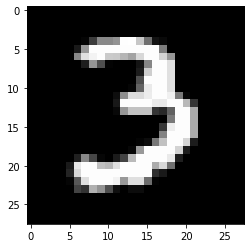

In [ ]:
two = two.values.reshape(28, 28)
plt.imshow(two, cmap='gray')

In [ ]:
Two = df.iloc[2, 1:]
Two.shape

(784,)

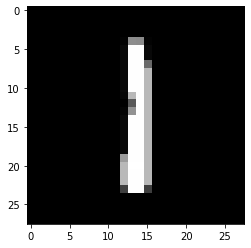

In [ ]:
Two = Two.values.reshape(28, 28)
plt.imshow(Two, cmap='gray')

In [ ]:
Two = df.iloc[8, 1:]
Two.shape

(784,)

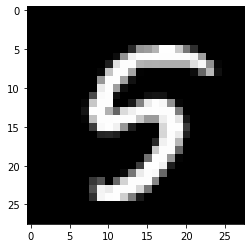

In [ ]:
Two = Two.values.reshape(28, 28)
plt.imshow(Two, cmap='gray')

In [ ]:
print(two[5:-5, 5:-5])

[[  0  25 152 253 253 253 253 253 253 253 253 253 124   0   0   0   0   0]
 [  0 135 225 244 253 202 200 181 164 216 253 253 211 151   0   0   0   0]
 [  0   0  30 149  78   3   0   0   0  20 134 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28 206 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  78 253 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5  99 234 253 253 224   0   0   0   0]
 [  0   0   0   0   0   0  14 142 220 219 236 253 253 240 121   7   0   0]
 [  0   0   0   0   0   0  24 253 253 253 253 235 233 253 253 185  53   0]
 [  0   0   0   0   0   0   8 150 194 194 194  53  40  97 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 122 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 237 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 130 253 253 253 170   0]
 [  0   0   0   0   0   0   0   0   0   4  12 120 193 253 253 214  28   0]
 [  0   0   0   0   0   0

In [ ]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
100*(round(df.label.astype('category').value_counts()/len(df.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [ ]:
from sklearn.preprocessing import scale
x = scale(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


SVM using linear kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [0 0]
 ...
 [4 4]
 [2 2]
 [1 1]]


In [ ]:
y_pred

array([3, 6, 9, ..., 2, 7, 2])

In [ ]:
y_pred[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[777   0   8   4   3   6  11   0   3   1]
 [  0 947   4   1   0   1   1   2   5   0]
 [ 11  10 775  16  11   7   9   8  12   1]
 [  2   3  24 779   1  24   0   5  17   8]
 [  3   5   9   1 777   3   5   3   3  18]
 [  8   7   7  37   5 660   8   2  17   5]
 [  6   0  16   0  12  10 796   0   1   0]
 [  3   5  11   5  12   0   1 834   5  23]
 [  5  14  12  30   5  24   6   2 662   8]
 [ 11   4   6   7  32   9   1  26   6 710]]


0.9186904761904762

SVM using rbf kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [0 0]
 ...
 [4 4]
 [2 2]
 [1 1]]


In [ ]:
y_pred

array([1, 3, 0, ..., 4, 2, 1])

In [ ]:
y_pred[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3576    0   18   11    3   13   55   17   22    0]
 [   0 4103   14   17    7    1    7   20    9    7]
 [  22   18 3415   59   41    6   37  133   53    6]
 [   3   17   89 3527    4   74   10   82   63   31]
 [   5   11   46    3 3431   12   26   55    5  108]
 [  18   18   19  123   16 3011   87   63   32   31]
 [  31   10   11    1   11   30 3527   50   22    0]
 [   3   24   27   10   30    5    1 3755    6   93]
 [  12   48   42   76   20   92   22   54 3259   40]
 [  21   10   17   47   92    8    0  200   19 3364]]


0.9250793650793651

Grid search

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}
svc_grid_search = svm.SVC(kernel="rbf")
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Cross-value

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.554105,0.166734,3.429843,0.010946,1,0.01,"{'C': 1, 'gamma': 0.01}",0.719048,0.759524,0.686905,0.733333,0.726190,0.725000,0.023450,9
1,7.870214,0.092099,2.272236,0.016679,1,0.001,"{'C': 1, 'gamma': 0.001}",0.925000,0.921429,0.908333,0.911905,0.923810,0.918095,0.006709,3
2,11.515160,0.094289,2.950723,0.013504,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.876190,0.884524,0.866667,0.873810,0.883333,0.876905,0.006547,6
3,24.921899,0.242027,3.435973,0.006981,10,0.01,"{'C': 10, 'gamma': 0.01}",0.733333,0.775000,0.709524,0.746429,0.744048,0.741667,0.021176,7
4,6.743436,0.082404,2.075837,0.022052,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941667,0.927381,0.915476,0.910714,0.930952,0.925238,0.011076,1
5,5.336171,0.073486,1.923249,0.011046,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.921429,0.925000,0.900000,0.910714,0.920238,0.915476,0.009066,4
6,24.874850,0.245330,3.433773,0.006880,100,0.01,"{'C': 100, 'gamma': 0.01}",0.733333,0.775000,0.709524,0.746429,0.744048,0.741667,0.021176,7
7,6.588684,0.078521,2.067591,0.024642,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938095,0.929762,0.914286,0.908333,0.929762,0.924048,0.010999,2
8,4.008830,0.040084,1.660956,0.020841,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.908333,0.920238,0.886905,0.890476,0.923810,0.905952,0.015040,5


In [ ]:
best_C = 1
best_gamma = 0.001

svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_final.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = svm_final.predict(x_test)

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)
print(confusion)

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]


In [ ]:
print("Final_test_accuracy:" ,test_accuracy)

Final_test_accuracy: 0.924973544973545
